In [1]:
##使用算法聚类

In [2]:
#美颜

In [3]:

import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def loadData(filePath):
    f = open(filePath, 'rb') #以二进制形式打开文件
    data = []
    img = Image.open(f)  #以列表的形式返回图片像素值
    m, n = img.size   #获取图片的大小
    for i in range(m):  #将每个像素点的RGB颜色处理到0-1
        for j in range(n):
            x,y,z = img.getpixel((i,j))
            data.append([x/256.0, y/256.0, z/256.0]) #范围内并存入data
    f.close()
    return np.mat(data), m, n #以矩阵的形式返回data，以及图片大小

path = 'face.jpg'
imgData, row, col = loadData(filePath= path)
print(imgData)
print(row)
print(col)


[[0.05078125 0.015625   0.        ]
 [0.03125    0.01171875 0.        ]
 [0.01171875 0.         0.        ]
 ...
 [0.03515625 0.03515625 0.03515625]
 [0.03125    0.03125    0.03125   ]
 [0.04296875 0.04296875 0.04296875]]
800
1200


In [4]:
#加载高斯混合聚类算法
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=0)

imgData = np.array(imgData)
#聚类获取每个像素所属的类别
label = gmm.fit_predict(imgData)
print(label)
'''
score = silhouette_score(imgData,label)
score
'''


[0 0 0 ... 2 2 2]


'\nscore = silhouette_score(imgData,label)\nscore\n'

<PIL.Image.Image image mode=L size=800x1200 at 0x2708D7D1D00>


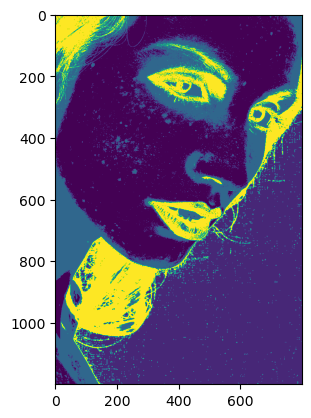

In [5]:
label = label.reshape([row, col])


#创建一张新的灰度图保存聚类后的结果
pic_new = Image.new('L', (row, col))
print(pic_new)
#根据所属类别向图片中添加灰度值
# 最终利用聚类中心点的RGB值替换原图中每一个像素点的值，便得到了最终的分割后的图片
for i in range(row):
    for j in range(col):
        pic_new.putpixel((i, j), int(256 / (label[i][j] + 1)))

#以JPEG格式保存图片
pic_new.save("result.jpg","JPEG")
plt.imshow(pic_new)
plt.show()

In [6]:
face_label1 = 0
face_label2 = 2
face_mask = (label == face_label1) | (label == face_label2)
face_mask


array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [7]:
#磨皮区域二值掩码
face_mask = face_mask.astype(int)
face_mask = face_mask.reshape([row, col])
print(face_mask)
print(face_mask.shape)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
(800, 1200)


<PIL.Image.Image image mode=L size=800x1200 at 0x2708D7D15E0>


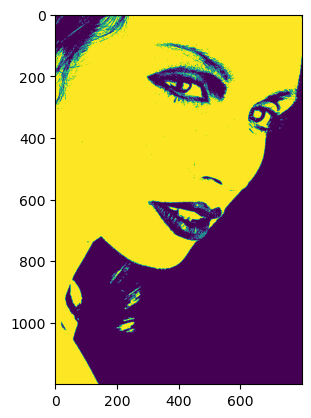

In [8]:

#创建一张新的灰度图保存聚类后的结果
pic_new = Image.new('L', (row, col))
print(pic_new)
#根据所属类别向图片中添加灰度值
# 最终利用聚类中心点的RGB值替换原图中每一个像素点的值，便得到了最终的分割后的图片
for i in range(row):
    for j in range(col):
        pic_new.putpixel((i, j), int(256 / (face_mask[i][j] + 1)))

#以JPEG格式保存图片
pic_new.save("mask.jpg","JPEG")
plt.imshow(pic_new)
plt.show()

In [9]:
import cv2
import numpy as np


def apply_skin_smoothing(image, mask):

    # 将图像和掩码转换为浮点数类型
    image = image.astype(np.float32) / 255.0
    mask = mask.astype(np.float32) / 255.0

    #Expand dimensions of the mask
    mask = np.expand_dims(mask, axis=-1)

    # Bilateral filter
    sigma_color = 75
    sigma_space = 75
    blur_img = cv2.bilateralFilter(image, 20, sigma_color, sigma_space)

    # 将磨皮区域与原始图像融合
    result_img = cv2.addWeighted(image, 0.3, blur_img, 0.7, 0)

    result = image * (1 - mask) + result_img * mask

    return result

# 读取原始图像
# 读取图像和磨皮区域的二值掩码
image = cv2.imread('face.jpg')
mask = cv2.imread('mask.jpg', cv2.IMREAD_GRAYSCALE)


# 应用磨皮效果
result_image = apply_skin_smoothing(image, mask)

# 显示结果
cv2.imshow("Original Image", image)
cv2.imshow("Skin Smoothing Result", result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 保存处理后的图片
cv2.imwrite("Skin_Smoothing.jpg", (result_image * 255).astype(np.uint8))


True

In [10]:
import cv2
from PIL import Image, ImageEnhance
import numpy as np

def skin_whitening(img, mask):

    # 将图像和掩码转换为浮点数类型
    img = img.astype(np.float32) / 255.0
    mask = mask.astype(np.float32) / 255.0

    # 进行美白操作，仅在掩码为1的区域进行处理
    result_img = img.copy()
    result_img[mask == 1] *= 1.2  # 调整亮度，可以根据需求调整倍数
    return result_img


result_img = skin_whitening(image, mask)

# 将结果保存或显示
cv2.imshow('Original Image', image)
cv2.imshow('Result Image', result_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 保存处理后的图片
cv2.imwrite("white.jpg", (result_img * 255).astype(np.uint8))




True